## <p style="text-align: right;"> Nic Wiggins </p>

You **NEED** to participate both individually and in groups in class to successfully complete this assignment and receive credits for it.


# In-Class Assignment: Symmetric Matrices and Positive Definite

<img src="http://brickisland.net/cs177/wp-content/uploads/2011/11/ddg_definiteness.svg" width="80%">
<p style="text-align: right;">Image from: http://mlwiki.org/index.php/Positive-Definite_Matrices</p>

    

### Agenda for today's class (80 minutes)

**Section 5.3 of the textbook**
</p>
1. (20 minutes) Pre-class Assignment Review
1. (40 minutes) Positive Definite Matrices (referring to Symmetric Matrices)
1. (20 minutes) Minima


In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
sym.init_printing()

---
# 1. Pre-class Assignment Review

[15--Symmetric_Matrices-pre-class-assignment](../preclass/15--Symmetric_Matrices-pre-class-assignment.ipynb)

# 2. Positive Definite Matrices

**Definition:** A *positive definite* matrix is a symmetric matrix with all positive eigenvalues. 

**Definition:** A *positive semidefinite* matrix is a symmetric matrix with all nonnegative eigenvalues (may have eigenvalue 0).


**Properties of a positve definite matrice $A$:** 
   * All pivots are positive    
   * All determinants for the upper left submatrices are positive. For a $n\times n$ matrix, we need to check $n$ submatrices ($1\times 1, 2\times 2,\dots, n\times n$). 
   * $x^\top A x >0$ for any nonzero column vector $x\neq 0$
   * $A = R^\top R$ where $R$ has independent columns.
   
**Properties of a positve semidefinite matrice $A$:** 
   * All eigenvalues are nonnegative
   * $x^\top A x \geq 0$ for any column vector $x$

**Diagonal matrix $D$:**
   * $D$ is positive definite if and only if the diagonal elements of $D$ are positive.

In [2]:
a, b, c, d, lamda, d1, d2, d3, x1, x2, x3 = sym.symbols('a b c d lamda d1 d2 d3 x1 x2 x3')

In [3]:
D = sym.Matrix([[d1, 0, 0], [0, d2, 0], [0, 0, d3]])
x_vect = sym.Matrix([x1, x2, x3])
x_vect.transpose(), D, x_vect

⎛              ⎡d₁  0   0 ⎤  ⎡x₁⎤⎞
⎜              ⎢          ⎥  ⎢  ⎥⎟
⎜[x₁  x₂  x₃], ⎢0   d₂  0 ⎥, ⎢x₂⎥⎟
⎜              ⎢          ⎥  ⎢  ⎥⎟
⎝              ⎣0   0   d₃⎦  ⎣x₃⎦⎠

In [4]:
x_vect.transpose() * D * x_vect

⎡     2        2        2⎤
⎣d₁⋅x₁  + d₂⋅x₂  + d₃⋅x₃ ⎦

A symmetric matrix $A$ can be orthogonally diagonalized, that is, there exist a orthogonal matrix $S$ such that $$A= S^\top D S$$

When we consider the properties of positive definite matrices, we can think about diagonal matrices. 

* Not *all* symmetric matrices with a positive determinant are definite positive.  (If we have two negative diagonal elements, the determinant is positive.)
* It is important to note that the sub-determinant must also be positive. (This is the same as saying that all diagonal elements are positive.)

For the following small symmetric matrix
$$\begin{bmatrix}2 & -2 & -1 \\ -2 & 0 & -1 \\ -1 & -1 & -1 \end{bmatrix}$$

&#9989;  <font color=red>** Do this:**</font> Answer the following questions:
* The determinant of $A$ is positive or not?
* Find the eigenvalues of $A$.
* Is $A$ positive definite?

In [7]:
A = np.matrix([[2,-2,-1],[-2,0,-1],[-1,-1,-1]])
np.linalg.det(A)

In [8]:
np.linalg.eig(A)

(array([ 3.26354285, -2.50790277,  0.24435992]),
 matrix([[-0.86088999,  0.41847145, -0.28939605],
         [ 0.50177055,  0.60413271, -0.61907187],
         [ 0.08423029,  0.67816319,  0.73006845]]))

In [10]:
# No not positive definite. There is a negative eigenvalue and determinant is negative

**Projection matrices:**  A matrix $P$ is called a *projection matrix*  if $P^2=P$ (after you project one vector $x$ to a subspace, the projection $Px$ is in the subspace. Therefore, the projection of $Px$ is itself, i.e., $P^2x=Px$ for any vector $x$).
   * The eigenvalues are either 0 or 1 (Let $x$ be an eigenvector corresponding to the eigenvalue $\lambda$, then we have $Px =\lambda x$ and $P^2x= \lambda^2x$. Therefore, $\lambda^2=\lambda$.)
   * If this projection matrix is positive definite
       * The eigenvalues must all be 1 (since they must be greater than zero)
       * The only matrix that satisfies this property is the identity matrix (Because any symmetric matrix can be orthogonally diagonalized to a diagonal matrix, and the eigenvalues are the same for similar matrices. If all eigenvalues are 1, then the matrix has to be the identify matrix.)
   

$P = SDS^T$

$if D = I$

$P = SS^T = I$

**A $2\times 2$ example** 

Let's first consider the $2\times 2$ symmetric matrix 
$$A=\begin{bmatrix}a & b  \\ b & c \end{bmatrix}$$

**Method 1** We can find the eigenvalues 
$$\lambda_1 = {a+c + \sqrt{(a+c)^2-4(ac-b^2)}\over 2}\quad \lambda_2 = {a+c - \sqrt{(a+c)^2-4(ac-b^2)}\over 2}$$
In order to get a positive definite matrix $A$, we need both eigenvalues are positive. Therefore, we need $a+c > \sqrt{(a+c)^2-4(ac-b^2)}$. 
It means that $a+c>0$ and $ac-b^2>0$.  

In fact, we can verify that $\lambda_1+\lambda_2=a+c$ and $\lambda_1\cdot\lambda_2=ac-b^2$.

**Theorem:** The trace is the sum of the eigenvalues. The determinant is the product of all the eigenvalues.

**Method 2** Find the eigenvalues is difficult for large matrices. So we need to use another way. 
Let's find all the pviots.

$$A=\begin{bmatrix}a & b  \\ b & c \end{bmatrix}$$
Multiply Row 1 by $-{b\over a}$ and add to Row 2
$$\begin{bmatrix}a & b  \\ 0 & c-{b^2\over a} \end{bmatrix}$$
Therefore, $A$ is positive definite if and only if $a>0$ and $c-{b^2\over a}>0$.

**Method 3** We can find the determinant for the top left sub-matrices. 
We have $a>0$ and $ac-b^2>0$.

&#9989;  <font color=red>** DO THIS:**</font> Find all the values for $a$ such the matrix 
$$A1=\begin{bmatrix}2 & 6  \\ 6 & a \end{bmatrix}$$
is positive definite. 
Pick one method and explain why you choose this method.

In [11]:
# put your answer here 
# method 3
#2a-36>0, a > 18
A1 = sym.Matrix([[2, 6], [6, a]])
A1

⎡2  6⎤
⎢    ⎥
⎣6  a⎦

Let's deal with the case when $a=18$. Conisder the matrix 
$$A2=\begin{bmatrix}2 & 6  \\ 6 & 18 \end{bmatrix}$$


&#9989;  <font color=red>** DO THIS:**</font> Find all the eigenvalues for $A2$. What can you say about this matrix?

In [24]:
# put your answer here 
A2 = sym.Matrix([[2, 6], [6, 18]])
A2
A2.eigenvects()

⎡⎛      ⎡⎡-3⎤⎤⎞  ⎛       ⎡⎡1/3⎤⎤⎞⎤
⎢⎜0, 1, ⎢⎢  ⎥⎥⎟, ⎜20, 1, ⎢⎢   ⎥⎥⎟⎥
⎣⎝      ⎣⎣1 ⎦⎦⎠  ⎝       ⎣⎣ 1 ⎦⎦⎠⎦

Let's look the $x^\top A x$ and visualize the plot.

In [25]:
x_vect = sym.Matrix([x1, x2])
f = x_vect.transpose() * A2 * x_vect
f.expand()

⎡    2                   2⎤
⎣2⋅x₁  + 12⋅x₁⋅x₂ + 18⋅x₂ ⎦

In [26]:
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

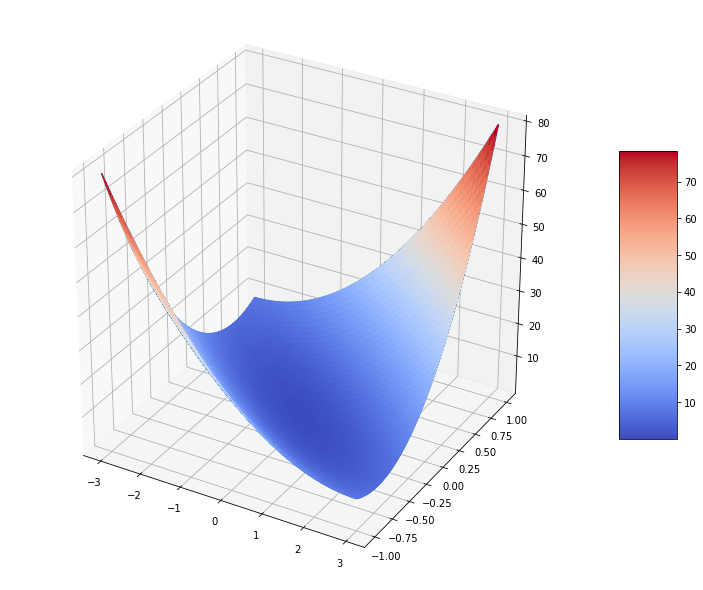

In [30]:
fig = plt.figure(figsize = (10, 8))
ax = Axes3D(fig)
x = sp.linspace(-3, 3, 100)
y = sp.linspace(-1, 1, 100)
[x, y] = sp.meshgrid(x, y)
z = 2 * x ** 2 + 12 * x * y + 26 * y ** 2  # 

ax.plot_wireframe(x, y, z, rstride = 5, cstride = 5)
surf = ax.plot_surface(x, y, z, cmap=plt.cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show();

First, we can see that the values are nonnegative. 
We can also see that the plot is like a *valley* because there is a line such that the value is zero on this line. 

&#9989;  <font color=red>** DO THIS:**</font> Change the value for $a$ and see the results ($a=6$ and $a=26$). What are the shapes for $a=6$ and $a=26$? Explain why?

a=6 see negative values - saddle. a = 26, looks like a bowl

# 3. Minima

We use the following function from our symmetric matrix above
$$ {f}\left({{x}_{1},{x}_{2}}\right)=2{x}_{1}^{2}+12{{x}_{1}}{{x}_{2}}+26{x}_{2}^{2} $$

Completing the square we have the following
$$ {f}\left({{x}_{1},{x}_{2}}\right)=2\left({x}_{1}+3{x}_{2}\right)^{2}+8{x}_{2}^2 $$

We can see that the function is a sum of two squares, thus nonnegative.  
The function value is $0$ if and only if $x_2=0$ and $x_1+3x_2=0$ (that is $x_1=x_2=0$). 

&#9989;  <font color=red>** DO THIS:**</font> Find the LU decompositon for the corresponding symmetric matrix. What can you tell from the LU decomposition of the matrix and the sum of square form.

In [33]:
# finish the code here.
A3 = sym.Matrix([[2, 6], [6, 26]])
A3.LUdecomposition()
# 1x1 3x2, 0x1 3x2, 2 and 8 multipliers

⎛⎡1  0⎤  ⎡2  6⎤    ⎞
⎜⎢    ⎥, ⎢    ⎥, []⎟
⎝⎣3  1⎦  ⎣0  8⎦    ⎠

$$ (x_1,x_2)*A*(x_1,x_2)^T  = {f}\left({{x}_{1},{x}_{2}}\right)=2{x}_{1}^{2}+12{{x}_{1}}{{x}_{2}}+26{x}_{2}^{2} $$

$$ (x_1,x_2)*L*D*L^T*(x_1,x_2)^T  $$
$$ (x_1 + 3x_2, x_2)*([2,0],[0,8])*(x_1+3x_2,x_2)^T  $$

From calculus, we know that if we want to find a extrema, we need to let the first derivative equals zero. 
Let's do this for the function $f(x_1,x_2)$.

&#9989;  <font color=red>** DO THIS:**</font> Find $(x_1,x_2)$ such that the first partial derivative $\partial_{x_1} f(x_1,x_2)$ and $\partial_{x_2}f(x_1,x_2)$ are all zero.

$\partial_{x_1} f(x_1,x_2) = 4(x_1+3x_2)$

$\partial_{x_2}f(x_1,x_2) = 12(x_1+3x_2)+16x_2$

In [11]:
A = np.matrix([[4,12,0],[12,52,0]])
sym.Matrix(A).rref()
# Non singular, so only 1 solution

⎛⎡1  0  0⎤        ⎞
⎜⎢       ⎥, (0, 1)⎟
⎝⎣0  1  0⎦        ⎠

For 1D, we know that the extrema is a local strict minimum if the second derivative is positive. 
For 2D, the extrema is a local strict minimum if the second derivative is positive definite. 
That is 
$$ \begin{bmatrix} \frac { \partial  }{ \partial {x_1}\partial {x_1} }  & \frac { \partial  }{ \partial {x_1}\partial {x_2} }  \\ \frac { \partial  }{ \partial {x_2}\partial x_1 }  & \frac { \partial  }{ \partial {x_2}\partial {x_2} }  \end{bmatrix} $$ is 
positive definite.

&#9989;  <font color=red>** DO THIS:**</font> We change to $$ {f}\left({{x}_{1},{x}_{2}}\right)=2{x}_{1}^{2}+12{{x}_{1}}{{x}_{2}}+6{x}_{2}^{2} $$
Step 1: Find $(x_1,x_2)$ such that the first partial derivative $\partial_{x_1} f(x_1,x_2)$ and $\partial_{x_2}f(x_1,x_2)$ are all zero.

Step 2: Find the matrix of second derivative and tell whether this extrema is local minima or not? 

Step 3: Go back to the plot in the previous section to see shape of this function.

In [13]:
J = np.matrix([[4,12],[12,52]])
J
J1 = np.matrix([[4,12],[0,16]]) #leading pivots positve thus positive definite

J26 = np.matrix([[4,12],[0,-24]])  #leading pivots not positive, thus not positve definite

-----
### Congratulations, we're almost done!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's dropbox (Don't forget to add your names in the first cell).


&#169; Copyright 2018,  Michigan State University Board of Trustees